In [1]:
import pandas as pd
import numpy as np
import nltk

In [2]:
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('vader_lexicon')    #sentimental analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ashok\AppData\Roaming\nltk_data...


True

In [5]:
### Datasets URL
#https://github.com/skathirmani/datasets
#-narendra modi tweets
#-amazon reviews
#-hotstar reviews
#-imdb sentiment

#goto github and download data or
# click on narendra modi tweets-view raw
#take the url 


In [6]:
url='https://raw.githubusercontent.com/skathirmani/datasets/master/narendramodi_tweets.csv'
modi=pd.read_csv(url)
modi.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [8]:
modi.shape #semi structured---text and non text cols

(3220, 14)

this can be done on any twitter data

In [9]:
#time period to #know the time period

In [10]:
modi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 14 columns):
id                      3220 non-null float64
retweets_count          3220 non-null float64
favorite_count          3220 non-null float64
created_at              3220 non-null object
text                    3220 non-null object
lang                    3220 non-null object
retweeted               3220 non-null bool
followers_count         3220 non-null float64
friends_count           3220 non-null float64
hashtags_count          3220 non-null float64
description             3220 non-null object
location                3220 non-null object
background_image_url    3220 non-null object
source                  3220 non-null object
dtypes: bool(1), float64(6), object(7)
memory usage: 330.3+ KB


In [11]:
#convert created_at to date column

In [13]:
modi['created_at']=pd.to_datetime(modi['created_at'])
modi.info() #now it is converted to date time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 14 columns):
id                      3220 non-null float64
retweets_count          3220 non-null float64
favorite_count          3220 non-null float64
created_at              3220 non-null datetime64[ns]
text                    3220 non-null object
lang                    3220 non-null object
retweeted               3220 non-null bool
followers_count         3220 non-null float64
friends_count           3220 non-null float64
hashtags_count          3220 non-null float64
description             3220 non-null object
location                3220 non-null object
background_image_url    3220 non-null object
source                  3220 non-null object
dtypes: bool(1), datetime64[ns](1), float64(6), object(6)
memory usage: 330.3+ KB


In [14]:
modi['created_at'].min(),modi['created_at'].max()

(Timestamp('2016-03-09 12:22:10'), Timestamp('2017-01-31 11:00:07'))

In [15]:
#so the date range is march-2016 to jan-2017

In [17]:
#numerical column -  distribution analysis ,min,max....(bar,hist,pairplot)
#categorical - frequency analysis (count)
#text - bag of words analysis (collection of unique words along with freq)

In [18]:
#from bag of words- identify the frequency- then take 50- den do word cloud

In [19]:
!pip.install wordcloud #download wordcloud

'pip.install' is not recognized as an internal or external command,
operable program or batch file.


# Identify bag of words

In [20]:
from wordcloud import WordCloud

In [21]:
import matplotlib.pyplot as plt

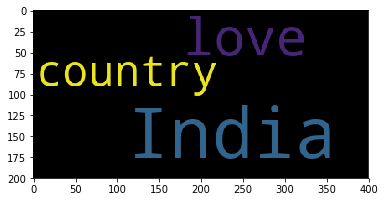

In [23]:
#example

wc=WordCloud().generate('i love India. India is my country')  #have to pass single string
plt.imshow(wc)

In [24]:
# the word india is used twice so India is shown in big font, c=since the freq is high

now in our data we have multiple data in each rows

In [25]:
#how to add all the strings here we have 3000

In [28]:
x=['a','b','c','d']
''.join(x)

('abcd', 'a-b-c-d')

In [30]:
'-'.join(x)  #using seperator

'a-b-c-d'

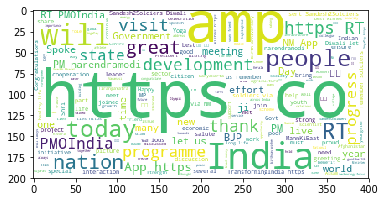

In [32]:
wc=WordCloud(background_color='white').generate(''.join(modi['text']))
plt.imshow(wc)

In [33]:
#https,amp,co we have to remove that since its part of url

In [34]:
#from this we can see that most of the hes talking about india,people,visit,natian,development...etc

In [35]:
# we have to do text cleaning

In [40]:
stopwords=nltk.corpus.stopwords.words('english') #default stopwords (common  might not be used for most of the analysis)
type(stopwords)

list

In [45]:
len(stopwords) #by default it will wliminate these 179 words

187

In [38]:
#depending on the analysis we shld  remove or not
#for sentimental analysis stopwords are most imp--increase the polarity in the sentences

# Bag of word analysis

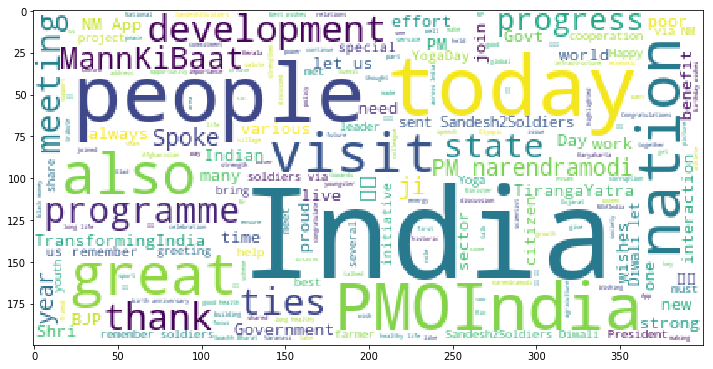

In [46]:
stopwords.extend(['https','co','amp','RT'])    #to add https/co/url/RT-retweet   #custom stop words, 179 + these words #specific to the domain
wc=WordCloud(background_color='white',stopwords=stopwords).generate(''.join(modi['text']))
plt.figure(figsize=(12,10))
plt.imshow(wc)

In [43]:
#this is much better compared to the original one

 # Text cleaning

1. stopwords (common+custom)

2. mix cases (convert everything into lowercase,nothing wrong in capital letters) # stopwords are lower

3. special characters

4. Identifying root words-called as stemming

 #example play,palyed,playing,plays (same word in diff tenses) two types
 
 #a. stemming
 
 #b. lematization

In [48]:
#when we try to identify rootword for organization it will find as organ, which has different meaning

In [54]:
#for sentimental analysis using polarity method--we will not do any text cleaning, coz every part has meaning, will impact 
#if we remove emoticons, like smiley--we will miss those data

In [55]:
#for classification, summarization we do cleaning..etc

1. convert everything to lowercase
2. remove stopwords
3. remove special characters
4. identify root of the words

# convert everything to lowercase

In [58]:
docs=modi['text'].str.lower() #converting to lower cases
docs.head()

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

# apply regular exp to retain only alphabets, has symbol and @ symbol
#remove special characters

In [82]:
#docs.str.replace('[^a-zA-z0-9#@]',' ')

In [77]:
#example
x=pd.Series(['this is a sentence with numbers 123',
            'this is a sentence with sepcial characters $#@!@',
            'THIS is a sentence WITH MIX cases'])
x.str.replace('a','-')#to replace a with -

0                 this is - sentence with numbers 123
1    this is - sentence with sepci-l ch-r-cters $#@!@
2                   THIS is - sentence WITH MIX c-ses
dtype: object

In [78]:
x.str.replace('a','')#to remove a

0              this is  sentence with numbers 123
1    this is  sentence with sepcil chrcters $#@!@
2                 THIS is  sentence WITH MIX cses
dtype: object

In [79]:
x.str.replace('[0-9]','')

0                    this is a sentence with numbers 
1    this is a sentence with sepcial characters $#@!@
2                   THIS is a sentence WITH MIX cases
dtype: object

In [80]:
x.str.replace('[a-z]','')

0                  123
1                $#@!@
2    THIS    WITH MIX 
dtype: object

In [83]:
x.str.replace('[a-zA-Z]','')

0             123
1           $#@!@
2                
dtype: object

In [84]:
x.str.replace('[a-zA-Z0-9]','')

0                
1           $#@!@
2                
dtype: object

In [91]:
x.str.replace('[^a-z\s]','') #we have to retain spaces as well
#or
#x.str.replace('[^a-z ]','')

0               this is a sentence with numbers 
1    this is a sentence with sepcial characters 
2                          is a sentence   cases
dtype: object

In [92]:
x.str.replace('[^a-z #@]','')

0                  this is a sentence with numbers 
1    this is a sentence with sepcial characters #@@
2                             is a sentence   cases
dtype: object

In [93]:
############################################

In [98]:
docs_clean=docs.str.replace('[^a-z #@]','')
docs_clean.head(2)

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
Name: text, dtype: object

In [104]:
###session 2

In [100]:
docs_clean.head() # go thru each sentences manually and remove those stop words

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

In [103]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['https','rt','cp','amp'])
#setmming---go to each sentence and clena it one by one

stemming

In [105]:
stemmer=nltk.stem.PorterStemmer()  #ends with s removes s, ing---removes ing
stemmer.stem('playing')

'play'

In [106]:
stemmer.stem('played')

'play'

In [141]:
x=['play','playing','played','plays']
y=['quality','qualities','qualitative']
[stemmer.stem(word) for word in x]  #using list comprehension to loop thru each sentences

['play', 'play', 'play', 'play']

In [142]:
[stemmer.stem(word) for word in y]

['qualiti', 'qualiti', 'qualit']

In [112]:
#will try for first 2 sentences
sample = docs_clean.head(2) 
sample


0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
Name: text, dtype: object

In [118]:
for tweet in sample:
    print(tweet)
    words=tweet.split(' ') #spliiting it by space , so that we get every word in a list
    print(words)
    print('-------')

the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards #transformingindia
['the', 'presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'amp', 'the', 'efforts', 'towards', '#transformingindia']
-------
rashtrapati jis address to both houses of parliament was indepth amp extensive do hear httpstcordkqtjgnnx @rashtrapatibhvn
['rashtrapati', 'jis', 'address', 'to', 'both', 'houses', 'of', 'parliament', 'was', 'indepth', 'amp', 'extensive', 'do', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
-------


In [122]:
#using list comprehension
for tweet in sample:
    print(tweet)
    words=tweet.split(' ') #spliiting it by space , so that we get every word in a list
    print(words)
    word_clean=[word for word in words if word not in stopwords]
    print(word_clean)
    print('-------')

the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards #transformingindia
['the', 'presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'amp', 'the', 'efforts', 'towards', '#transformingindia']
['presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'efforts', 'towards', '#transformingindia']
-------
rashtrapati jis address to both houses of parliament was indepth amp extensive do hear httpstcordkqtjgnnx @rashtrapatibhvn
['rashtrapati', 'jis', 'address', 'to', 'both', 'houses', 'of', 'parliament', 'was', 'indepth', 'amp', 'extensive', 'do', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
['rashtrapati', 'jis', 'address', 'houses', 'parliament', 'indepth', 'extensive', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
-------


In [123]:
#now the stopwords are removed

for stemming and removing stopwords

In [125]:
#stemming is also done wlong with stopwords removing
for tweet in sample:
    print(tweet)
    words=tweet.split(' ')
    print(words)
    word_clean=[stemmer.stem(word)for word in words if word not in stopwords]
    print(word_clean)
    print('-------')

the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards #transformingindia
['the', 'presidents', 'address', 'wonderfully', 'encapsulated', 'indias', 'strengths', 'aspirations', 'potential', 'amp', 'the', 'efforts', 'towards', '#transformingindia']
['presid', 'address', 'wonder', 'encapsul', 'india', 'strength', 'aspir', 'potenti', 'effort', 'toward', '#transformingindia']
-------
rashtrapati jis address to both houses of parliament was indepth amp extensive do hear httpstcordkqtjgnnx @rashtrapatibhvn
['rashtrapati', 'jis', 'address', 'to', 'both', 'houses', 'of', 'parliament', 'was', 'indepth', 'amp', 'extensive', 'do', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
['rashtrapati', 'ji', 'address', 'hous', 'parliament', 'indepth', 'extens', 'hear', 'httpstcordkqtjgnnx', '@rashtrapatibhvn']
-------


In [134]:
#joining back the sentences  after stemming and removing stopwords

for tweet in sample:
    #print(tweet)
    words=tweet.split(' ')
    #print(words)
    word_clean=[stemmer.stem(word)for word in words if word not in stopwords]
    text_clean=' '.join(word_clean)
    #print(word_clean)
    print(text_clean)
    print('-------')

presid address wonder encapsul india strength aspir potenti effort toward #transformingindia
-------
rashtrapati ji address hous parliament indepth extens hear httpstcordkqtjgnnx @rashtrapatibhvn
-------


Applying stemming and stopwords for the data

In [135]:
def clean_sentence(doc):
    words=doc.split(' ')
    words_clean=[stemmer.stem(word) for word in words if word not in stopwords]
    doc_clean=' '.join(words_clean)
    return doc_clean
docs_clean=docs_clean.apply(clean_sentence)
docs_clean.head()
    

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

# Summary till now # flow for classification problem

In [137]:
#converting to lower case
#removing unwanted characters
#removing stopwords
#stemming
docs_clean=modi['text'].str.lower().str.replace('[^a-z #@]','')
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['https','rt','cp','amp'])

def clean_sentence(doc):
    words=doc.split(' ')
    words_clean=[stemmer.stem(word) for word in words if word not in stopwords]
    doc_clean=' '.join(words_clean)
    return doc_clean
docs_clean=docs_clean.apply(clean_sentence)
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

#  End

In [139]:
#here meaning of the word is not needed, we are concerned about the presence of the word for classification problem
#example improv, qualiti etc

# Document term matrix

In [144]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer() #vectorizes the document#text into numbers

In [149]:
#takes collection os strings as input
#first it will geive matrix in compressed format matrix, from wch we can extrat the actual matrix also
#get the compressed, many ML algos can take this as input

In [151]:
vectorizer.fit(docs_clean) #ngram_range===uni/bi
#token_pattern=regex patterns
#max df===how many times a term should be appeared
#stop_words==can be english

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [159]:
vectorizer.get_feature_names()

['aabhar',
 'aadhaar',
 'aadhar',
 'aajtak',
 'aamirkhan',
 'aanandmayi',
 'aap',
 'aawa',
 'aazadisa',
 'abdel',
 'abduct',
 'abdul',
 'abdulaziz',
 'abdulla',
 'abdullah',
 'abe',
 'abeshinzo',
 'abeshinzow',
 'abhidecentguy',
 'abhikr',
 'abhinavbindra',
 'abhiyaan',
 'abhiyan',
 'abil',
 'abl',
 'abpnewstv',
 'abroad',
 'absolut',
 'abt',
 'abu',
 'abul',
 'abumathen',
 'abund',
 'academ',
 'academician',
 'acceler',
 'accept',
 'access',
 'accid',
 'accident',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'account',
 'ace',
 'aceh',
 'acharya',
 'achiev',
 'achuthanandan',
 'across',
 'act',
 'action',
 'activ',
 'ad',
 'ada',
 'adajansurat',
 'adama',
 'add',
 'addit',
 'addl',
 'address',
 'addwhi',
 'adelaljubeir',
 'adequ',
 'adgpi',
 'adhia',
 'adithyan',
 'adjoin',
 'adjust',
 'admin',
 'administr',
 'admir',
 'adopt',
 'adr',
 'adult',
 'adulyadej',
 'advanc',
 'advancingasiaconfer',
 'advani',
 'advantag',
 'advent',
 'adventur',
 'advers',
 'affair',
 'affect',
 '

In [160]:
len(vectorizer.get_feature_names())

7339

In [170]:
dtm=vectorizer.transform(docs_clean) #compressed output by default
dtm

<3220x7339 sparse matrix of type '<class 'numpy.int64'>'
	with 31587 stored elements in Compressed Sparse Row format>

In [163]:
#it just stores 31587 non zero values

In [168]:
tot_values=3220*7339
non_zero_values=31587
(non_zero_values/tot_values )* 100

0.1336643593022557

In [169]:
sparsity=(tot_values-non_zero_values )/tot_values* 100
sparsity

99.86633564069774

In [175]:
#dtm.toarray()
#which gives individual elements, and then convert to dataframe
df_dtm=pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())  #this is the uncomprssed format
df_dtm.head()

,aabhar,aadhaar,aadhar,aajtak,aamirkhan,aanandmayi,aap,aawa,aazadisa,abdel,...,yuvstrong,zaidi,zay,zeal,zero,zhejiang,ziara,zimbabw,zone,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Session-3

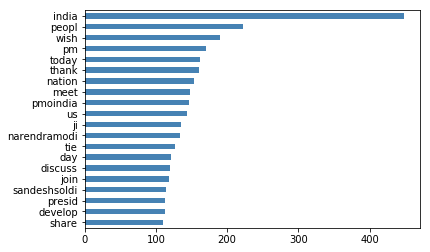

In [183]:
df_dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh(color='steelblue')#freq of each column

In [182]:
#gives top 20 column frequencies

Top hashtags

In [224]:
docs1_clean=modi['text'].str.lower().str.replace('[^a-z#@ ]','')
d=docs1_clean.str.split(' ')
wd=d.tolist()
hashtags=[]
for row in wd:
    row_hashtags=[word for word in row if word.startswith('#')]
    hashtags.extend(row_hashtags)

In [225]:
top_hashtags=pd.Series(hashtags).value_counts().head(20)
top_hashtags

#sandeshsoldiers         108
#mannkibaat               91
#tirangayatra             84
#yogaday                  53
#transformingindia        52
#idy                      44
#mycleanindia             24
#rio                      19
#                         14
#digidhanmela             10
#happydiwali               9
#yoga                      9
#presidentmukherjee        9
#iyd                       9
#paralympics               9
#diwali                    8
#swachhbharat              8
#internationalyogaday      7
#republicday               5
#swachhbharatabhiyan       4
dtype: int64

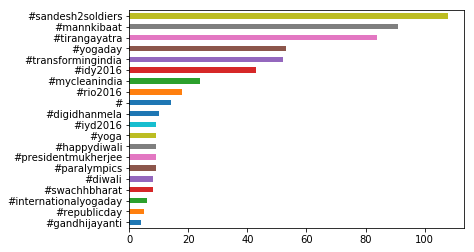

In [232]:
hashtags=[]
for doc in modi['text'].str.lower().str.replace('[^a-z0-9 #]',''):
    words=doc.split(' ')
    tweet_hashtags=[word for word in words if word.startswith('#')]
    hashtags.extend(tweet_hashtags)
pd.Series(hashtags).value_counts().head(20)[::-1].plot.barh()
#sandesh2soldiers  is the top tweet